In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import stereo as st
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

In [2]:
import stereo as st

In [3]:
path='K:\同仁医院人眼时空\\Y01047K2-9W\\gef\\'
sample='9w2all.cellbin_0.45'


In [4]:

data_select = sc.read_h5ad(f'{path}{sample}.h5ad')###

In [5]:
data_select

AnnData object with n_obs × n_vars = 4128 × 28746
    obs: 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'orig.ident', 'x', 'y'
    var: 'real_gene_name', 'n_cells', 'n_counts', 'mean_umi', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bin_size', 'bin_type', 'gene_exp_leiden', 'hvg', 'key_record', 'leiden_resolution', 'merged', 'neighbors', 'omics', 'pca_variance_ratio', 'rank_genes_groups', 'resolution', 'result_keys', 'sn'
    obsm: 'X_pca', 'X_umap', 'cell_border', 'spatial'
    obsp: 'connectivities', 'distances'

In [6]:
# 将 'real_gene_name' 列转换为普通字符串类型
data_select.var['real_gene_name'] = data_select.var['real_gene_name'].astype(str)

# 重新设置索引并确保唯一性
data_select.var.index = data_select.var['real_gene_name']
data_select.var_names_make_unique()

In [7]:
data_select.var

,real_gene_name,n_cells,n_counts,mean_umi,means,dispersions,dispersions_norm,highly_variable
real_gene_name,,,,,,,,
TSPAN6,TSPAN6,43,50,1.162791,0.356969,4.325941,-0.066102,False
TNMD,TNMD,3,3,1.000000,0.015618,3.081889,-1.343412,False
DPM1,DPM1,22,28,1.272727,0.178796,4.071733,0.336993,False
SCYL3,SCYL3,20,28,1.400000,0.168718,4.052869,0.304967,False
C1orf112,C1orf112,29,36,1.241379,0.306551,4.357605,0.031977,False
...,...,...,...,...,...,...,...,...
AL109627.1,AL109627.1,11,13,1.181818,0.082243,3.799483,-0.125191,False
AC084851.4,AC084851.4,1,1,1.000000,0.002762,2.434974,-2.441643,False
AC024558.2,AC024558.2,27,33,1.222222,0.211571,3.846189,-0.045902,False


In [8]:
# 目标路径
target_dir = f'{path}{sample}_zxres'###

# 如果路径不存在，则创建该路径
if not os.path.exists(target_dir):
    os.makedirs(target_dir)
    
os.chdir(target_dir)
## 更改完再检查一下有没有更改成功
print(os.getcwd())   #确定一下保存路径

K:\同仁医院人眼时空\Y01047K2-9W\gef\9w2all.cellbin_0.45_zxres


... storing 'real_gene_name' as categorical


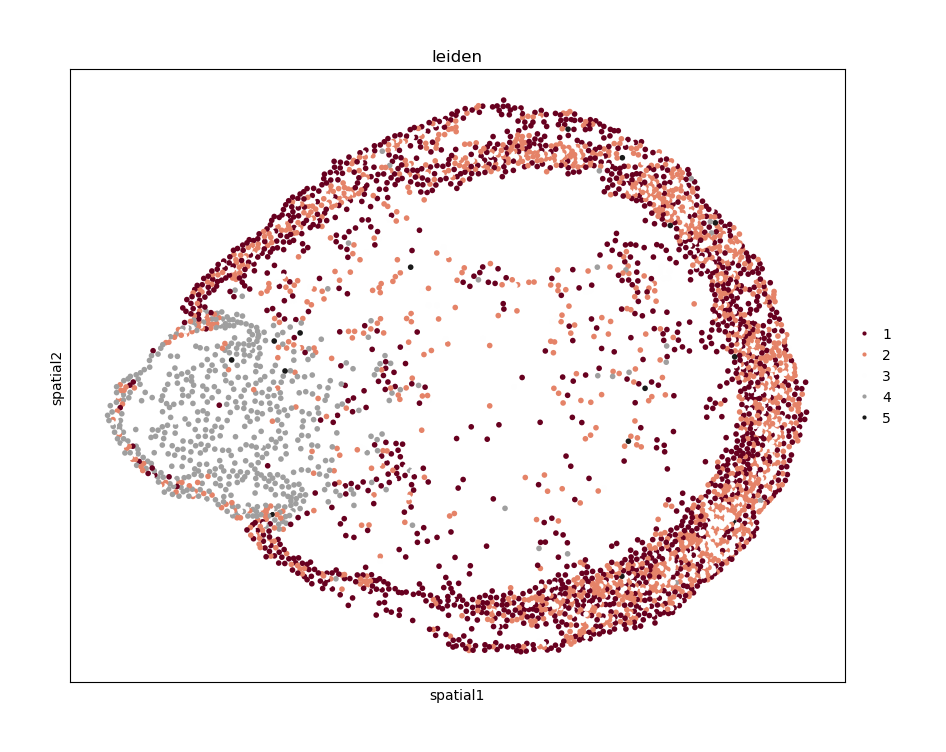

In [9]:
plt.rcParams["figure.figsize"] = (10, 10)
sc.pl.spatial(data_select, color=["leiden"],spot_size=50, size=0.5,palette='RdGy')#,save="leiden.pdf"

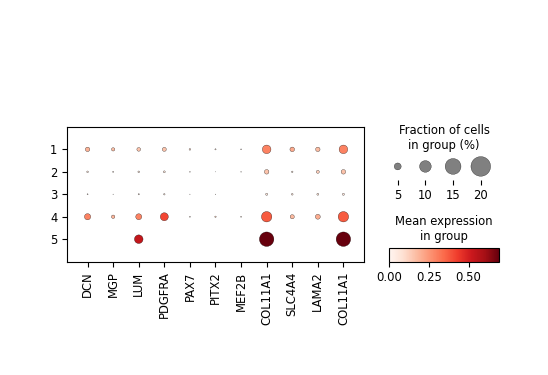

In [10]:
marker_genes = ['DCN','MGP','LUM','PDGFRA','PAX7','PITX2','MEF2B','COL11A1','SLC4A4','LAMA2','COL11A1']
sc.pl.dotplot(data_select, marker_genes,groupby=["leiden"],use_raw=False)#,save="markergene.dotplot.pdf"

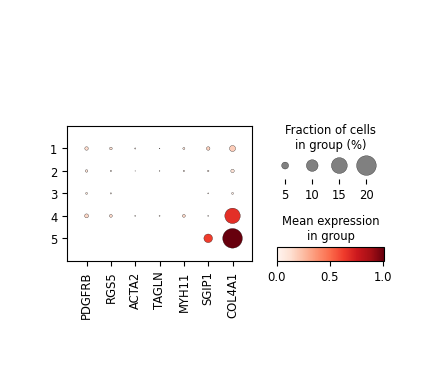

In [11]:
marker_genes = ['PDGFRB','RGS5','ACTA2','TAGLN','MYH11','SGIP1','COL4A1']
sc.pl.dotplot(data_select, marker_genes,groupby=["leiden"],use_raw=False)#,save="markergene.dotplot.pdf"

In [12]:
marker_genes = ['NEFM','NEFL','GAP43','VSX2','COL6A1','CD8B','DCN','LUM','COL1A1','COL1A2','COL3A1','CRYBB1','CRYBA1','CRYBB2','CRYAB','BEST1','MITF','TTR','CCND2','PMEL','TYRP1','MGP','COL2A1','CDH1','IGF2','SOX2','SOX9']

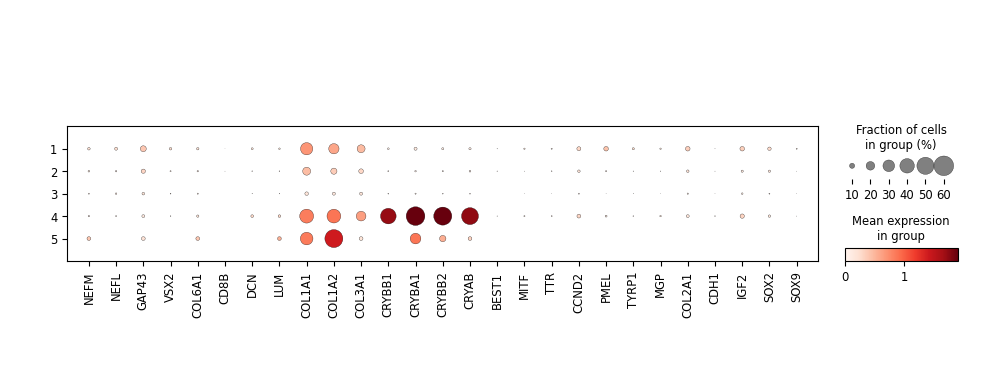

In [13]:
sc.pl.dotplot(data_select, marker_genes,groupby=["leiden"],use_raw=False)#,save="markergene.dotplot.pdf"

In [14]:
marker_genes = ['CYP2G1P','STAP1']

In [15]:
marker_genes = ['COL9A1','COL6A1','COL5A1','COL9A2','COL9A3','COL8A1','TLL2','COL7A1','COL4A2','COL28A1','COL27A1','COL1A1','COL3A1','COL1A2','P3H2','COL22A1','COL20A1','LAMA1','LAMA2','LAMB1','LAMB2','LAMC1','LAMA4','KRT8','KRT18','KRT19','FBN2']

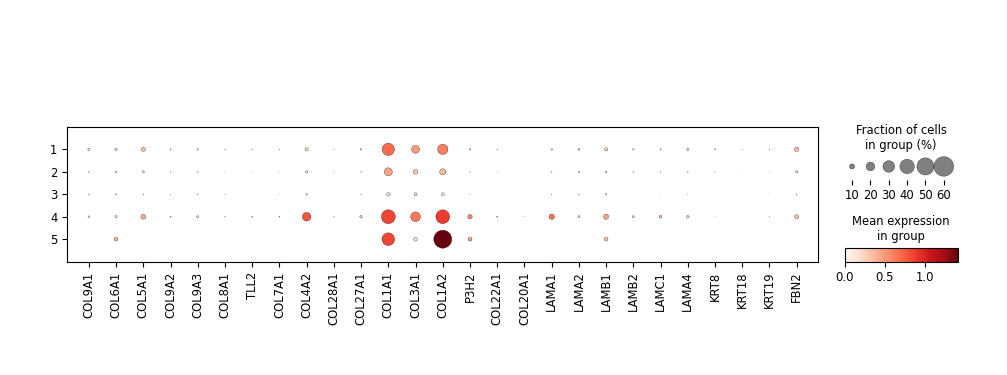

In [16]:
sc.pl.dotplot(data_select, marker_genes,groupby=["leiden"],use_raw=False)#,save="CLUSTER8_markergene_.dotplot.pdf"

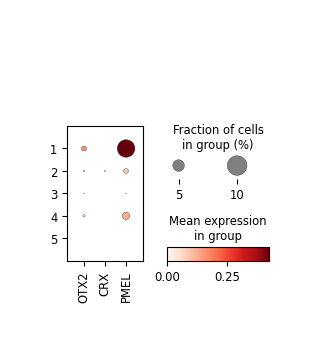

In [17]:
marker_genes = ['OTX2','CRX','PMEL']
sc.pl.dotplot(data_select, marker_genes,groupby=["leiden"],use_raw=False)#,save="CLUSTERONL.markergene.pdf"

In [18]:
print('COL9A1' in data_select.raw.var.index)

False


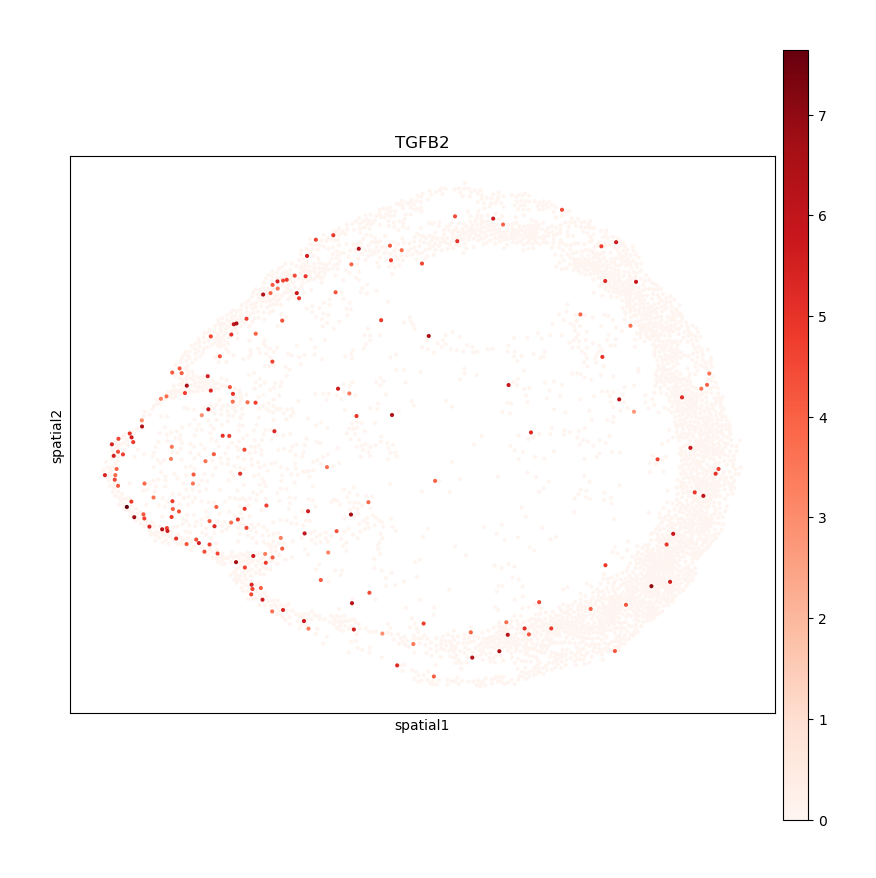

In [19]:
sc.pl.spatial(
        data_select,
        color=['TGFB2'],  # adata.var[idx].index
        spot_size=20,  # 设置点大小
        show=True,  # 显示图形
    use_raw=False,
    color_map='Reds'#,save="COL4_markergene.pdf"

    )

In [20]:
print(type(data_select))

<class 'anndata._core.anndata.AnnData'>


0.4


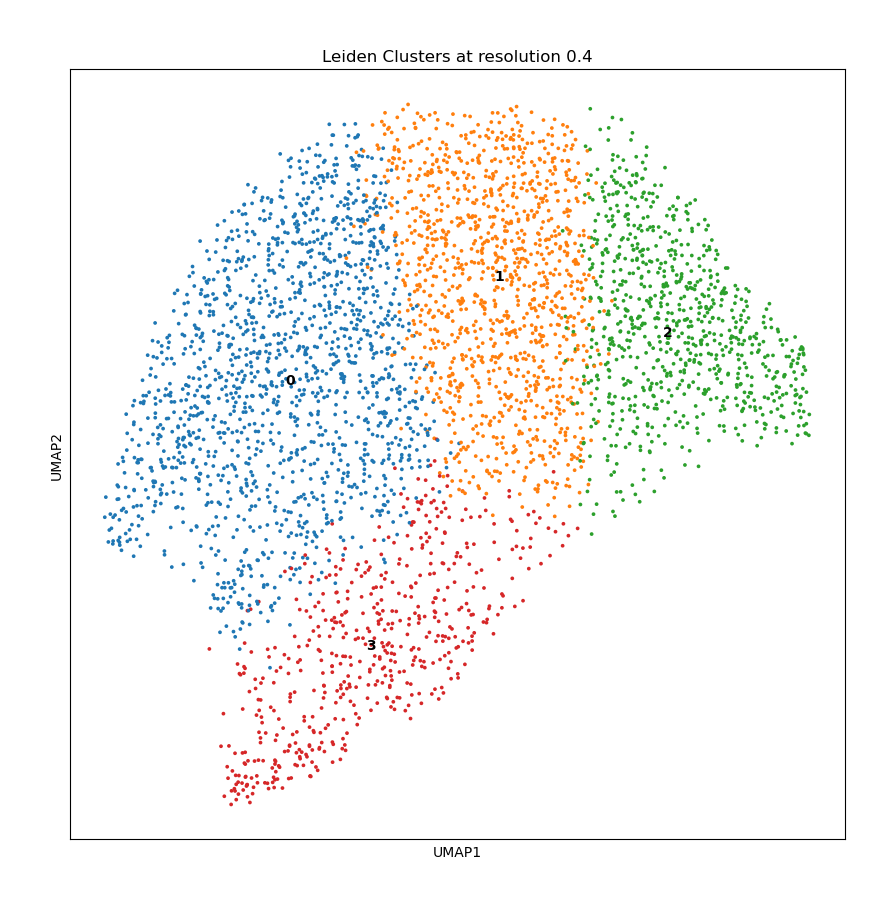

In [21]:
resolutions = [0.4]
for res in resolutions:
    print(res)
    key_name = f'leiden_{res}'
    sc.tl.leiden(data_select, resolution=res,  key_added=key_name)

for res in resolutions:
    sc.pl.umap(data_select, color=f'leiden_{res}', legend_loc='on data', title=f'Leiden Clusters at resolution {res}')

In [22]:
print(data_select.obs_keys())


['dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'orig.ident', 'x', 'y', 'leiden_0.4']


In [23]:
data_select.obs

,dnbCount,area,total_counts,n_genes_by_counts,pct_counts_mt,leiden,orig.ident,x,y,leiden_0.4
64823941404640,133,440,225,172,4.888889,2,sample,15093,6112,1
64789581666252,171,439,377,275,6.631300,1,sample,15085,6092,0
64755221927926,175,644,295,226,5.423729,1,sample,15077,6134,0
64639257810904,144,349,321,217,11.214953,1,sample,15050,6104,0
64613488007145,170,551,356,254,11.797753,1,sample,15044,6121,0
...,...,...,...,...,...,...,...,...,...,...
66215510810913,97,319,183,145,8.196721,2,sample,15417,8481,1
66185446039819,50,148,96,67,2.083333,3,sample,15410,8459,2
66159676236051,59,219,119,88,2.521008,3,sample,15404,8467,2
66099546693933,198,541,453,293,7.726269,1,sample,15390,8493,0


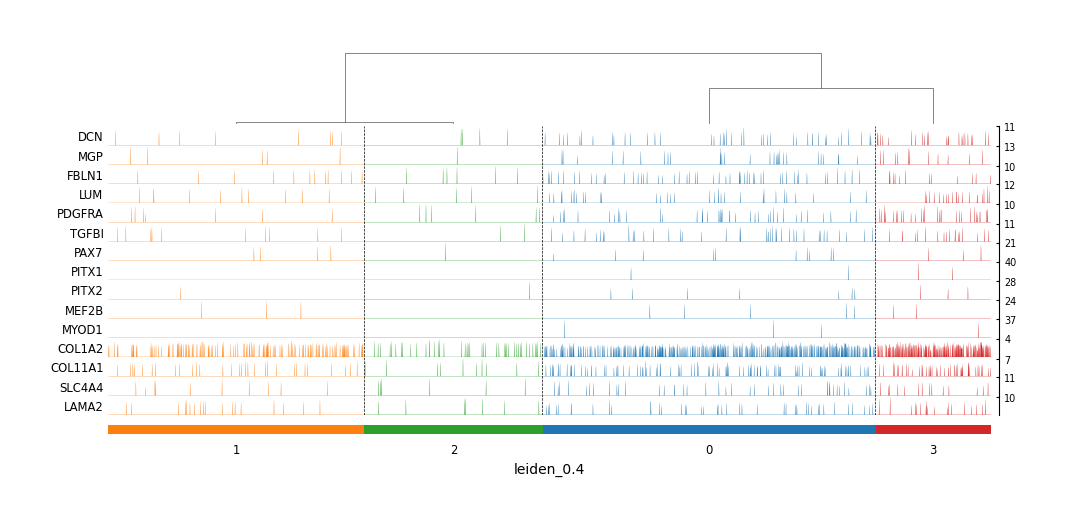

In [25]:
markers = ["DCN", "MGP", "FBLN1", "LUM", "PDGFRA", "TGFBI", "PAX7", "PITX1", "PITX2", "MEF2B", "MYOD1", "COL1A2", "COL11A1", "SLC4A4", "LAMA2"]
sc.pl.tracksplot(data_select, markers, groupby='leiden_0.4',use_raw=False, dendrogram=True,,save="markergene_tracksplot.pdf")

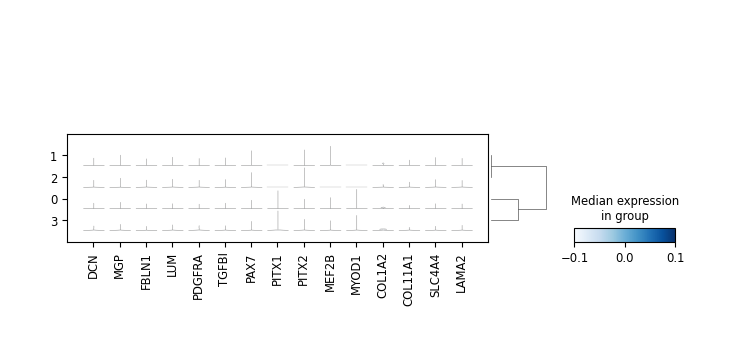

In [26]:
sc.pl.stacked_violin(data_select, markers, groupby='leiden_0.4',use_raw=False, dendrogram=True)